<a href="https://colab.research.google.com/github/Damntoochill/Learning-ML/blob/master/Iris_classifier_using_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
#import the  libraries needed
import seaborn as sbn
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegressionCV
from keras.models import Sequential
from keras.layers.core import Activation, Dense
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length','sepal-width','petal-length','petal-width','class']
dataset = pd.read_csv(url,names = names)

In [7]:
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


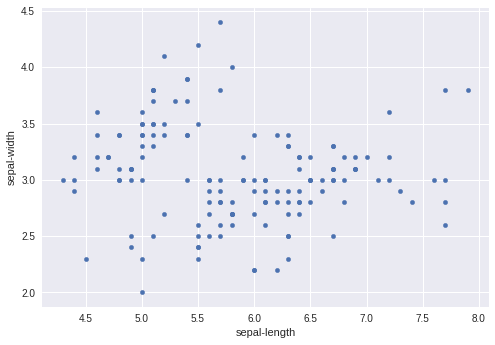

In [8]:
dataset.plot(kind = "scatter", x = "sepal-length", y = "sepal-width")
plt.show()

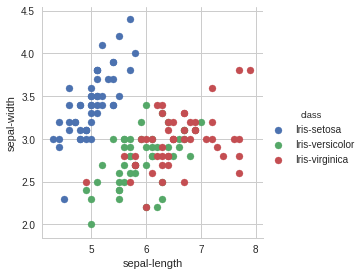

In [9]:
sbn.set_style("whitegrid")
sbn.FacetGrid(dataset,hue = "class",size = 4).map(plt.scatter,"sepal-length","sepal-width").add_legend()
plt.show()

The above one is a 2d scatter plot. We can also plot 3d scatter plots. but we cannot visualize 4d or 5d scatter plots. So we use pairplots.

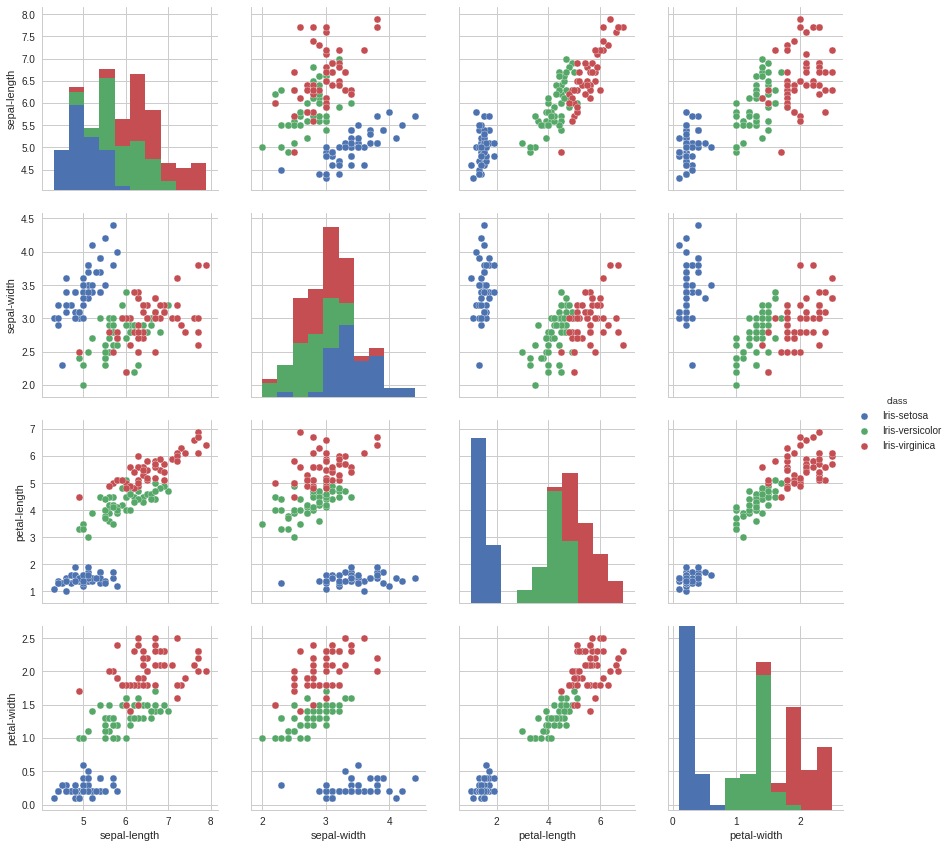

In [10]:
sbn.pairplot(dataset,hue = "class",size = 3)
plt.show()

In [0]:
train_x,test_x,train_y,test_y = train_test_split(x, y, test_size = 0.5, random_state = 0)

In [0]:
#creating an numpy array of objects
def objectify(arr):
  uniques, ids = np.unique(arr, return_inverse = True)
  return np_utils.to_categorical(ids,len(uniques))

train_y_obj = objectify(train_y)
test_y_obj = objectify(test_y)

In [0]:
model = Sequential()
model.add(Dense(16,input_shape = (4,)))
model.add(Activation('sigmoid'))
model.add(Dense(3))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [31]:
model.fit(train_x, train_y_obj, verbose = 0, batch_size = 1)


In [35]:
scores, accuracy = model.evaluate(test_x, test_y_obj)

75/75 [==============================] - 0s 74us/step


TypeError: ignored